# BIOS470/570 Lecture 7

## Last time we covered:
* ### Introduction to gene expression measurements
* ### pandas data frames, indexing with .loc and .iloc

## Today we will cover:
* ### Missing data, duplicated data, and string operations
* ### merging multiple data sets with pandas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
human_data = pd.read_excel('data/GSE137492_SupplementaryTable1.xlsx')
frog_data = pd.read_csv('data/xen_uic_hik_stage8_13_30min.tsv',delimiter='\t')

/Users/aw21/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


## More on dealing with missing data:

### The functions .isna and .notna for finding the missing or not missing data:

In [3]:
human_data

,genes,geneIds,media_1,media_2,bmp_1,bmp_2,bmpIwp2_1,bmpIwp2_2,bmpSb_1,bmpSb_2,media_avg,bmp_avg,bmpIwp2_avg,bmpSb_avg
0,NaN,ENSG00000069712.10,0.24,0.51,0.24,0.21,0.24,0.18,0.32,0.24,0.375,0.225,0.210,0.280
1,NaN,ENSG00000116957.12,23.37,23.92,12.21,12.75,12.91,13.76,12.49,15.45,23.645,12.480,13.335,13.970
2,NaN,ENSG00000130201.7,0.79,0.58,0.07,0.00,0.00,0.00,0.00,0.00,0.685,0.035,0.000,0.000
3,NaN,ENSG00000133808.4,0.00,0.00,0.07,0.00,0.04,0.08,0.00,0.12,0.000,0.035,0.060,0.060
4,NaN,ENSG00000155640.6,3.11,2.52,2.06,2.01,2.60,1.67,3.04,1.75,2.815,2.035,2.135,2.395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23180,ZXDC,ENSG00000070476.14,12.67,8.05,11.25,9.62,11.88,10.13,12.05,9.96,10.360,10.435,11.005,11.005
23181,ZYG11A,ENSG00000203995.9,0.43,0.46,0.29,0.33,0.06,0.13,0.50,0.40,0.445,0.310,0.095,0.450
23182,ZYG11B,ENSG00000162378.12,12.12,7.83,8.50,8.49,6.21,8.76,13.18,9.61,9.975,8.495,7.485,11.395
23183,ZYX,ENSG00000159840.15,107.01,127.39,114.96,101.24,118.28,98.82,82.78,105.05,117.200,108.100,108.550,93.915


In [4]:
human_data.isna()

,genes,geneIds,media_1,media_2,bmp_1,bmp_2,bmpIwp2_1,bmpIwp2_2,bmpSb_1,bmpSb_2,media_avg,bmp_avg,bmpIwp2_avg,bmpSb_avg
0,True,False,False,False,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23180,False,False,False,False,False,False,False,False,False,False,False,False,False,False
23181,False,False,False,False,False,False,False,False,False,False,False,False,False,False
23182,False,False,False,False,False,False,False,False,False,False,False,False,False,False
23183,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
human_data.notna()

,genes,geneIds,media_1,media_2,bmp_1,bmp_2,bmpIwp2_1,bmpIwp2_2,bmpSb_1,bmpSb_2,media_avg,bmp_avg,bmpIwp2_avg,bmpSb_avg
0,False,True,True,True,True,True,True,True,True,True,True,True,True,True
1,False,True,True,True,True,True,True,True,True,True,True,True,True,True
2,False,True,True,True,True,True,True,True,True,True,True,True,True,True
3,False,True,True,True,True,True,True,True,True,True,True,True,True,True
4,False,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23180,True,True,True,True,True,True,True,True,True,True,True,True,True,True
23181,True,True,True,True,True,True,True,True,True,True,True,True,True,True
23182,True,True,True,True,True,True,True,True,True,True,True,True,True,True
23183,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [7]:
human_data.loc[human_data.isna().any(axis = 1)]

,genes,geneIds,media_1,media_2,bmp_1,bmp_2,bmpIwp2_1,bmpIwp2_2,bmpSb_1,bmpSb_2,media_avg,bmp_avg,bmpIwp2_avg,bmpSb_avg
0,NaN,ENSG00000069712.10,0.24,0.51,0.24,0.21,0.24,0.18,0.32,0.24,0.375,0.225,0.210,0.280
1,NaN,ENSG00000116957.12,23.37,23.92,12.21,12.75,12.91,13.76,12.49,15.45,23.645,12.480,13.335,13.970
2,NaN,ENSG00000130201.7,0.79,0.58,0.07,0.00,0.00,0.00,0.00,0.00,0.685,0.035,0.000,0.000
3,NaN,ENSG00000133808.4,0.00,0.00,0.07,0.00,0.04,0.08,0.00,0.12,0.000,0.035,0.060,0.060
4,NaN,ENSG00000155640.6,3.11,2.52,2.06,2.01,2.60,1.67,3.04,1.75,2.815,2.035,2.135,2.395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,NaN,ENSG00000281932.1,1.40,0.39,0.26,0.14,0.00,0.12,0.94,0.97,0.895,0.200,0.060,0.955
199,NaN,ENSG00000282031.1,7.22,0.00,4.12,0.00,6.91,1.44,0.00,0.00,3.610,2.060,4.175,0.000
200,NaN,ENSG00000282056.1,2.02,1.33,1.99,1.43,1.80,1.17,1.74,1.91,1.675,1.710,1.485,1.825
201,NaN,ENSG00000282558.1,2.35,1.71,0.63,0.00,0.49,3.79,2.24,2.11,2.030,0.315,2.140,2.175


In [8]:
human_data.fillna("No Name")

,genes,geneIds,media_1,media_2,bmp_1,bmp_2,bmpIwp2_1,bmpIwp2_2,bmpSb_1,bmpSb_2,media_avg,bmp_avg,bmpIwp2_avg,bmpSb_avg
0,No Name,ENSG00000069712.10,0.24,0.51,0.24,0.21,0.24,0.18,0.32,0.24,0.375,0.225,0.210,0.280
1,No Name,ENSG00000116957.12,23.37,23.92,12.21,12.75,12.91,13.76,12.49,15.45,23.645,12.480,13.335,13.970
2,No Name,ENSG00000130201.7,0.79,0.58,0.07,0.00,0.00,0.00,0.00,0.00,0.685,0.035,0.000,0.000
3,No Name,ENSG00000133808.4,0.00,0.00,0.07,0.00,0.04,0.08,0.00,0.12,0.000,0.035,0.060,0.060
4,No Name,ENSG00000155640.6,3.11,2.52,2.06,2.01,2.60,1.67,3.04,1.75,2.815,2.035,2.135,2.395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23180,ZXDC,ENSG00000070476.14,12.67,8.05,11.25,9.62,11.88,10.13,12.05,9.96,10.360,10.435,11.005,11.005
23181,ZYG11A,ENSG00000203995.9,0.43,0.46,0.29,0.33,0.06,0.13,0.50,0.40,0.445,0.310,0.095,0.450
23182,ZYG11B,ENSG00000162378.12,12.12,7.83,8.50,8.49,6.21,8.76,13.18,9.61,9.975,8.495,7.485,11.395
23183,ZYX,ENSG00000159840.15,107.01,127.39,114.96,101.24,118.28,98.82,82.78,105.05,117.200,108.100,108.550,93.915


### Many commands take an inplace argument so that it modifies but does not return the variable:

In [9]:
human_data.dropna(inplace=True)

In [10]:
human_data

,genes,geneIds,media_1,media_2,bmp_1,bmp_2,bmpIwp2_1,bmpIwp2_2,bmpSb_1,bmpSb_2,media_avg,bmp_avg,bmpIwp2_avg,bmpSb_avg
203,A1BG,ENSG00000121410.11,8.21,19.67,2.80,16.57,1.80,8.62,2.26,7.46,13.940,9.685,5.210,4.860
204,A1BG-AS1,ENSG00000268895.5,4.13,2.99,2.98,4.80,3.28,3.30,2.37,3.97,3.560,3.890,3.290,3.170
205,A1CF,ENSG00000148584.14,0.00,0.00,0.00,0.03,0.00,0.00,0.02,0.02,0.000,0.015,0.000,0.020
206,A2M,ENSG00000175899.14,0.00,0.00,0.00,0.28,0.73,0.35,0.00,0.00,0.000,0.140,0.540,0.000
207,A2M-AS1,ENSG00000245105.2,0.00,0.29,0.00,0.07,0.06,0.00,0.10,0.09,0.145,0.035,0.030,0.095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23180,ZXDC,ENSG00000070476.14,12.67,8.05,11.25,9.62,11.88,10.13,12.05,9.96,10.360,10.435,11.005,11.005
23181,ZYG11A,ENSG00000203995.9,0.43,0.46,0.29,0.33,0.06,0.13,0.50,0.40,0.445,0.310,0.095,0.450
23182,ZYG11B,ENSG00000162378.12,12.12,7.83,8.50,8.49,6.21,8.76,13.18,9.61,9.975,8.495,7.485,11.395
23183,ZYX,ENSG00000159840.15,107.01,127.39,114.96,101.24,118.28,98.82,82.78,105.05,117.200,108.100,108.550,93.915


In [11]:
human_data.index = human_data.loc[:,"genes"]
human_data.drop("genes",axis=1,inplace=True)

In [12]:
human_data

,geneIds,media_1,media_2,bmp_1,bmp_2,bmpIwp2_1,bmpIwp2_2,bmpSb_1,bmpSb_2,media_avg,bmp_avg,bmpIwp2_avg,bmpSb_avg
genes,,,,,,,,,,,,,
A1BG,ENSG00000121410.11,8.21,19.67,2.80,16.57,1.80,8.62,2.26,7.46,13.940,9.685,5.210,4.860
A1BG-AS1,ENSG00000268895.5,4.13,2.99,2.98,4.80,3.28,3.30,2.37,3.97,3.560,3.890,3.290,3.170
A1CF,ENSG00000148584.14,0.00,0.00,0.00,0.03,0.00,0.00,0.02,0.02,0.000,0.015,0.000,0.020
A2M,ENSG00000175899.14,0.00,0.00,0.00,0.28,0.73,0.35,0.00,0.00,0.000,0.140,0.540,0.000
A2M-AS1,ENSG00000245105.2,0.00,0.29,0.00,0.07,0.06,0.00,0.10,0.09,0.145,0.035,0.030,0.095
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZXDC,ENSG00000070476.14,12.67,8.05,11.25,9.62,11.88,10.13,12.05,9.96,10.360,10.435,11.005,11.005
ZYG11A,ENSG00000203995.9,0.43,0.46,0.29,0.33,0.06,0.13,0.50,0.40,0.445,0.310,0.095,0.450
ZYG11B,ENSG00000162378.12,12.12,7.83,8.50,8.49,6.21,8.76,13.18,9.61,9.975,8.495,7.485,11.395


### Pandas has commands for dealing with duplicated data. Both the dataframe and its index object can be marked for duplicates

In [13]:
human_data.duplicated()

genes
A1BG        False
A1BG-AS1    False
A1CF        False
A2M         False
A2M-AS1     False
            ...  
ZXDC        False
ZYG11A      False
ZYG11B      False
ZYX         False
ZZEF1       False
Length: 22982, dtype: bool

In [14]:
human_data.duplicated().any()

False

In [15]:
human_data.loc[human_data.index.duplicated()]

,geneIds,media_1,media_2,bmp_1,bmp_2,bmpIwp2_1,bmpIwp2_2,bmpSb_1,bmpSb_2,media_avg,bmp_avg,bmpIwp2_avg,bmpSb_avg
genes,,,,,,,,,,,,,
ALG1L9P,ENSG00000254978.2,0.40,0.00,0.00,0.48,0.00,0.00,0.00,0.32,0.200,0.240,0.000,0.160
BMS1P4,ENSG00000271816.1,0.53,0.46,0.62,0.98,1.41,1.03,1.79,1.36,0.495,0.800,1.220,1.575
CYB561D2,ENSG00000271858.5,0.00,0.00,0.14,0.56,0.00,0.00,0.30,1.52,0.000,0.350,0.000,0.910
DNAJC9-AS1,ENSG00000236756.4,40.32,31.90,19.03,21.20,24.55,18.80,24.08,20.62,36.110,20.115,21.675,22.350
LINC01238,ENSG00000261186.2,0.00,0.00,0.12,0.31,0.13,0.40,0.12,0.31,0.000,0.215,0.265,0.215
MATR3,ENSG00000280987.2,15.05,15.23,5.11,7.54,4.16,3.09,1.78,3.60,15.140,6.325,3.625,2.690
PINX1,ENSG00000258724.1,0.44,0.67,3.60,1.26,7.90,0.00,5.69,0.00,0.555,2.430,3.950,2.845
POLR2J4,ENSG00000272655.1,4.26,6.93,4.80,5.96,3.48,4.04,4.94,5.56,5.595,5.380,3.760,5.250
RF00017,ENSG00000280502.1,1.66,0.00,3.84,4.24,2.78,0.00,2.10,0.00,0.830,4.040,1.390,1.050


### Notice each duplicate only appears once, what if we wanted to see them all. This is showing us all instances of the duplicates except for the first. The following shows all except the last one:

In [16]:
human_data[human_data.index.duplicated(keep = "last")]

,geneIds,media_1,media_2,bmp_1,bmp_2,bmpIwp2_1,bmpIwp2_2,bmpSb_1,bmpSb_2,media_avg,bmp_avg,bmpIwp2_avg,bmpSb_avg
genes,,,,,,,,,,,,,
ALG1L9P,ENSG00000248671.7,0.10,0.07,0.00,0.00,0.09,0.00,0.10,0.07,0.085,0.000,0.045,0.085
BMS1P4,ENSG00000242338.6,0.97,1.38,0.44,0.00,0.93,0.00,0.76,0.28,1.175,0.220,0.465,0.520
CYB561D2,ENSG00000114395.10,9.76,12.59,13.30,11.89,17.03,12.86,12.40,11.79,11.175,12.595,14.945,12.095
DNAJC9-AS1,ENSG00000227540.1,0.40,2.59,1.95,1.10,0.00,1.26,0.20,2.74,1.495,1.525,0.630,1.470
LINC01238,ENSG00000237940.3,0.27,0.00,0.00,0.00,0.00,0.06,0.00,0.04,0.135,0.000,0.030,0.020
MATR3,ENSG00000015479.17,273.49,272.62,217.32,214.63,193.19,232.11,242.11,230.42,273.055,215.975,212.650,236.265
PINX1,ENSG00000254093.8,27.51,42.25,18.07,20.41,11.57,23.51,13.55,26.18,34.880,19.240,17.540,19.865
POLR2J4,ENSG00000214783.9,1.06,0.60,0.29,0.73,0.18,0.69,0.33,0.13,0.830,0.510,0.435,0.230
RF00017,ENSG00000276800.1,0.00,0.00,0.00,0.00,0.00,0.00,4.63,1.92,0.000,0.000,0.000,3.275


### And this shows them all:

In [17]:
human_data[human_data.index.duplicated(keep = False)]

,geneIds,media_1,media_2,bmp_1,bmp_2,bmpIwp2_1,bmpIwp2_2,bmpSb_1,bmpSb_2,media_avg,bmp_avg,bmpIwp2_avg,bmpSb_avg
genes,,,,,,,,,,,,,
ALG1L9P,ENSG00000248671.7,0.10,0.07,0.00,0.00,0.09,0.00,0.10,0.07,0.085,0.000,0.045,0.085
ALG1L9P,ENSG00000254978.2,0.40,0.00,0.00,0.48,0.00,0.00,0.00,0.32,0.200,0.240,0.000,0.160
BMS1P4,ENSG00000242338.6,0.97,1.38,0.44,0.00,0.93,0.00,0.76,0.28,1.175,0.220,0.465,0.520
BMS1P4,ENSG00000271816.1,0.53,0.46,0.62,0.98,1.41,1.03,1.79,1.36,0.495,0.800,1.220,1.575
CYB561D2,ENSG00000114395.10,9.76,12.59,13.30,11.89,17.03,12.86,12.40,11.79,11.175,12.595,14.945,12.095
CYB561D2,ENSG00000271858.5,0.00,0.00,0.14,0.56,0.00,0.00,0.30,1.52,0.000,0.350,0.000,0.910
DNAJC9-AS1,ENSG00000227540.1,0.40,2.59,1.95,1.10,0.00,1.26,0.20,2.74,1.495,1.525,0.630,1.470
DNAJC9-AS1,ENSG00000236756.4,40.32,31.90,19.03,21.20,24.55,18.80,24.08,20.62,36.110,20.115,21.675,22.350
LINC01238,ENSG00000237940.3,0.27,0.00,0.00,0.00,0.00,0.06,0.00,0.04,0.135,0.000,0.030,0.020


### Are there duplicated ensembl ids?

In [21]:
human_data.duplicated(subset=["media_1","media_2"]).any()

True

In [19]:
human_data.index.duplicated().any()

True

### Pandas has a number of built in string methods you can use for filtering and manipulating string data inside pandas objects

In [22]:
human_data.index.str.contains("BMP")

array([False, False, False, ..., False, False, False])

In [23]:
human_data.loc[human_data.index.str.contains("BMP")]

,geneIds,media_1,media_2,bmp_1,bmp_2,bmpIwp2_1,bmpIwp2_2,bmpSb_1,bmpSb_2,media_avg,bmp_avg,bmpIwp2_avg,bmpSb_avg
genes,,,,,,,,,,,,,
BMP1,ENSG00000168487.17,4.25,1.29,3.48,4.27,3.90,2.60,3.34,3.72,2.770,3.875,3.250,3.530
BMP2,ENSG00000125845.6,1.74,1.27,0.80,1.10,0.45,0.47,0.68,0.84,1.505,0.950,0.460,0.760
BMP2K,ENSG00000138756.17,9.87,8.90,23.89,16.79,9.52,11.84,16.99,10.40,9.385,20.340,10.680,13.695
BMP2KL,ENSG00000204113.6,0.00,0.00,0.00,0.00,0.00,0.00,0.21,0.00,0.000,0.000,0.000,0.105
BMP3,ENSG00000152785.6,0.00,0.00,0.19,0.14,0.19,0.16,0.05,0.31,0.000,0.165,0.175,0.180
BMP4,ENSG00000125378.15,0.88,3.35,31.05,47.96,77.56,52.32,38.52,63.48,2.115,39.505,64.940,51.000
BMP6,ENSG00000153162.8,0.92,0.87,0.00,0.10,0.23,0.00,0.00,0.10,0.895,0.050,0.115,0.050
BMP7,ENSG00000101144.12,5.24,2.46,38.88,37.21,33.30,16.59,50.71,45.08,3.850,38.045,24.945,47.895
BMP8A,ENSG00000183682.7,0.00,0.12,0.00,0.00,0.08,0.01,0.15,0.05,0.060,0.000,0.045,0.100


In [24]:
human_data.index.str.lower()

Index(['a1bg', 'a1bg-as1', 'a1cf', 'a2m', 'a2m-as1', 'a2ml1', 'a4galt', 'aaas',
       'aacs', 'aacsp1',
       ...
       'zw10', 'zwilch', 'zwint', 'zxda', 'zxdb', 'zxdc', 'zyg11a', 'zyg11b',
       'zyx', 'zzef1'],
      dtype='object', name='genes', length=22982)

### The .match method is for matching with regular expressions: (this is BMP, following by the numbers from 1 to 9, followed by the end of the string.

In [27]:
human_data.loc[human_data.index.str.match("BMP[1-9]{1,2}$")]

,geneIds,media_1,media_2,bmp_1,bmp_2,bmpIwp2_1,bmpIwp2_2,bmpSb_1,bmpSb_2,media_avg,bmp_avg,bmpIwp2_avg,bmpSb_avg
genes,,,,,,,,,,,,,
BMP1,ENSG00000168487.17,4.25,1.29,3.48,4.27,3.90,2.60,3.34,3.72,2.770,3.875,3.250,3.530
BMP2,ENSG00000125845.6,1.74,1.27,0.80,1.10,0.45,0.47,0.68,0.84,1.505,0.950,0.460,0.760
BMP3,ENSG00000152785.6,0.00,0.00,0.19,0.14,0.19,0.16,0.05,0.31,0.000,0.165,0.175,0.180
BMP4,ENSG00000125378.15,0.88,3.35,31.05,47.96,77.56,52.32,38.52,63.48,2.115,39.505,64.940,51.000
BMP6,ENSG00000153162.8,0.92,0.87,0.00,0.10,0.23,0.00,0.00,0.10,0.895,0.050,0.115,0.050
BMP7,ENSG00000101144.12,5.24,2.46,38.88,37.21,33.30,16.59,50.71,45.08,3.850,38.045,24.945,47.895


In [28]:
human_data.loc[human_data.index.str.match("SOX[1-9]{1,2}$")] #"SOX" following by a number from 1 to 9 once or twice

,geneIds,media_1,media_2,bmp_1,bmp_2,bmpIwp2_1,bmpIwp2_2,bmpSb_1,bmpSb_2,media_avg,bmp_avg,bmpIwp2_avg,bmpSb_avg
genes,,,,,,,,,,,,,
SOX1,ENSG00000182968.4,0.05,0.00,0.00,0.05,0.00,0.04,0.00,0.00,0.025,0.025,0.020,0.000
SOX11,ENSG00000176887.6,23.15,14.05,7.01,7.33,8.34,6.97,10.09,9.61,18.600,7.170,7.655,9.850
SOX12,ENSG00000177732.7,49.31,36.49,24.32,19.71,16.86,15.82,23.20,17.90,42.900,22.015,16.340,20.550
SOX13,ENSG00000143842.14,71.86,57.16,51.99,40.60,45.96,33.87,49.51,49.72,64.510,46.295,39.915,49.615
SOX14,ENSG00000168875.2,0.00,0.08,0.17,0.21,0.06,0.12,0.00,0.05,0.040,0.190,0.090,0.025
SOX15,ENSG00000129194.7,3.44,3.06,6.23,5.18,4.80,3.64,7.17,3.57,3.250,5.705,4.220,5.370
SOX17,ENSG00000164736.5,0.00,0.00,0.05,0.00,0.27,0.00,0.00,0.04,0.000,0.025,0.135,0.020
SOX18,ENSG00000203883.6,0.00,0.00,0.00,0.00,0.28,0.00,0.06,0.05,0.000,0.000,0.140,0.055
SOX2,ENSG00000181449.3,104.26,135.91,0.18,0.79,3.15,0.94,0.40,2.41,120.085,0.485,2.045,1.405


In [29]:
human_data.loc[human_data.index.str.match("SOX[1-9]{2}$")] #needs two digits

,geneIds,media_1,media_2,bmp_1,bmp_2,bmpIwp2_1,bmpIwp2_2,bmpSb_1,bmpSb_2,media_avg,bmp_avg,bmpIwp2_avg,bmpSb_avg
genes,,,,,,,,,,,,,
SOX11,ENSG00000176887.6,23.15,14.05,7.01,7.33,8.34,6.97,10.09,9.61,18.60,7.170,7.655,9.850
SOX12,ENSG00000177732.7,49.31,36.49,24.32,19.71,16.86,15.82,23.20,17.90,42.90,22.015,16.340,20.550
SOX13,ENSG00000143842.14,71.86,57.16,51.99,40.60,45.96,33.87,49.51,49.72,64.51,46.295,39.915,49.615
SOX14,ENSG00000168875.2,0.00,0.08,0.17,0.21,0.06,0.12,0.00,0.05,0.04,0.190,0.090,0.025
SOX15,ENSG00000129194.7,3.44,3.06,6.23,5.18,4.80,3.64,7.17,3.57,3.25,5.705,4.220,5.370
SOX17,ENSG00000164736.5,0.00,0.00,0.05,0.00,0.27,0.00,0.00,0.04,0.00,0.025,0.135,0.020
SOX18,ENSG00000203883.6,0.00,0.00,0.00,0.00,0.28,0.00,0.06,0.05,0.00,0.000,0.140,0.055
SOX21,ENSG00000125285.5,1.12,1.20,0.45,0.25,1.09,0.80,0.39,0.81,1.16,0.350,0.945,0.600


### Let's look at our frog data again and then manipulate the index so that it is similar to the human one:

In [30]:
frog_data

,Gene,UIC_1,UIC_2,UIC_3,UIC_4,UIC_5,UIC_6,UIC_7,UIC_8,UIC_9,...,hiK_4,hiK_5,hiK_6,hiK_7,hiK_8,hiK_9,hiK_10,hiK_11,hiK_12,hiK_13
0,ERCC-00002,31214.576742,20746.843327,15820.337040,20838.927449,25080.934940,29831.229808,24861.131004,36816.482281,34312.248268,...,28184.968376,19688.475156,29938.310266,28541.843106,30003.888946,23624.073849,29761.774428,22035.255266,26465.297048,21269.691751
1,ERCC-00003,437.926357,557.064559,866.145398,433.958134,818.379659,679.768702,500.984542,809.144548,406.137935,...,352.206012,492.214783,291.434743,808.480389,237.734226,301.385919,237.534037,460.571027,306.159383,482.196969
2,ERCC-00004,5806.778562,8623.257792,8237.850004,8178.254056,10592.701113,9891.303195,8726.999262,12260.089501,11976.640426,...,13608.644991,16566.958407,9654.972170,12133.451188,14265.971389,12083.938179,8698.798098,12887.553996,12818.688844,12838.119950
3,ERCC-00009,1088.855183,863.714979,671.476023,802.093203,1035.790118,1219.818702,1046.460250,1396.138819,1639.751660,...,1517.123939,991.687522,1460.126178,1427.445192,1620.857266,1145.198951,1564.682693,1073.023014,1322.888859,1045.675688
4,ERCC-00012,0.000000,0.379541,0.452181,0.738587,0.000000,0.343011,0.000000,0.000000,0.306320,...,0.000000,0.347242,0.381030,0.000000,0.245311,0.000000,0.000000,0.245311,0.615651,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34279,gene9998,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.201554,0.000000
34280,gene9999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
34281,gene999|pigc,61.549566,91.810776,92.165413,65.268938,52.588501,33.829544,20.088473,9.646476,3.793154,...,108.464857,61.554529,40.733655,25.499081,14.261506,7.053554,7.076894,3.491820,3.906363,3.400443
34282,gene99|pagr1,118.843645,92.368324,87.064401,82.688666,99.880389,101.344282,86.835663,108.325443,93.598130,...,141.626022,153.652799,148.496698,116.247660,93.938793,86.450597,73.302971,73.243916,64.223707,65.597644


In [31]:
frog_genes = frog_data.loc[:,"Gene"]

In [32]:
frog_genes

0                ERCC-00002
1                ERCC-00003
2                ERCC-00004
3                ERCC-00009
4                ERCC-00012
                ...        
34279              gene9998
34280              gene9999
34281          gene999|pigc
34282          gene99|pagr1
34283    gene9|LOC100494672
Name: Gene, Length: 34284, dtype: object

In [33]:
frog_gene_names = np.zeros(len(frog_genes)).astype(str)
for ii in range(len(frog_genes)):
    if frog_genes[ii].count('|') > 0:
        gn = frog_genes[ii].split('|')
        frog_gene_names[ii] = gn[1]
    else:
        frog_gene_names[ii] = np.nan
        

In [34]:
frog_data.index = frog_gene_names
frog_data

,Gene,UIC_1,UIC_2,UIC_3,UIC_4,UIC_5,UIC_6,UIC_7,UIC_8,UIC_9,...,hiK_4,hiK_5,hiK_6,hiK_7,hiK_8,hiK_9,hiK_10,hiK_11,hiK_12,hiK_13
nan,ERCC-00002,31214.576742,20746.843327,15820.337040,20838.927449,25080.934940,29831.229808,24861.131004,36816.482281,34312.248268,...,28184.968376,19688.475156,29938.310266,28541.843106,30003.888946,23624.073849,29761.774428,22035.255266,26465.297048,21269.691751
nan,ERCC-00003,437.926357,557.064559,866.145398,433.958134,818.379659,679.768702,500.984542,809.144548,406.137935,...,352.206012,492.214783,291.434743,808.480389,237.734226,301.385919,237.534037,460.571027,306.159383,482.196969
nan,ERCC-00004,5806.778562,8623.257792,8237.850004,8178.254056,10592.701113,9891.303195,8726.999262,12260.089501,11976.640426,...,13608.644991,16566.958407,9654.972170,12133.451188,14265.971389,12083.938179,8698.798098,12887.553996,12818.688844,12838.119950
nan,ERCC-00009,1088.855183,863.714979,671.476023,802.093203,1035.790118,1219.818702,1046.460250,1396.138819,1639.751660,...,1517.123939,991.687522,1460.126178,1427.445192,1620.857266,1145.198951,1564.682693,1073.023014,1322.888859,1045.675688
nan,ERCC-00012,0.000000,0.379541,0.452181,0.738587,0.000000,0.343011,0.000000,0.000000,0.306320,...,0.000000,0.347242,0.381030,0.000000,0.245311,0.000000,0.000000,0.245311,0.615651,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nan,gene9998,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.201554,0.000000
nan,gene9999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
pigc,gene999|pigc,61.549566,91.810776,92.165413,65.268938,52.588501,33.829544,20.088473,9.646476,3.793154,...,108.464857,61.554529,40.733655,25.499081,14.261506,7.053554,7.076894,3.491820,3.906363,3.400443
pagr1,gene99|pagr1,118.843645,92.368324,87.064401,82.688666,99.880389,101.344282,86.835663,108.325443,93.598130,...,141.626022,153.652799,148.496698,116.247660,93.938793,86.450597,73.302971,73.243916,64.223707,65.597644


In [35]:
frog_data = frog_data.loc[~(frog_data.index == "nan")]
frog_data

,Gene,UIC_1,UIC_2,UIC_3,UIC_4,UIC_5,UIC_6,UIC_7,UIC_8,UIC_9,...,hiK_4,hiK_5,hiK_6,hiK_7,hiK_8,hiK_9,hiK_10,hiK_11,hiK_12,hiK_13
mier1,gene1000|mier1,87.944198,104.349357,133.847408,64.348241,102.039020,81.656630,54.904740,49.018713,26.245878,...,85.611112,78.856119,78.589232,89.407762,36.556339,33.003562,36.859428,40.531252,35.339500,41.495473
chka,gene1001|chka,1.140213,1.994629,1.213845,1.159420,1.771112,5.187861,5.040978,8.531887,4.777355,...,2.256396,1.237545,4.611081,7.442972,6.579970,6.089149,4.089246,4.943400,3.602140,6.829990
svop,gene1002|svop,2.576078,3.939170,3.641124,3.131018,2.785236,2.850128,2.639964,2.460845,2.076425,...,3.168796,3.019820,2.368032,2.465701,2.589030,1.754986,1.405372,2.216555,1.798270,2.003183
tmem59l,gene1003|tmem59l,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019301,...,0.026894,0.000000,0.000000,0.000000,0.000000,0.060958,0.060958,0.052837,0.000000,0.000000
LOC101732829,gene1004|LOC101732829,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.598277,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ing1,gene997|ing1,11.534321,19.328457,19.194766,6.197342,9.701231,7.020355,2.969023,3.117360,1.534216,...,14.192809,10.427095,6.215056,5.124496,1.252594,1.725955,1.441393,2.232568,2.822933,2.852477
mir125b-2,gene998|mir125b-2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.009471,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
pigc,gene999|pigc,61.549566,91.810776,92.165413,65.268938,52.588501,33.829544,20.088473,9.646476,3.793154,...,108.464857,61.554529,40.733655,25.499081,14.261506,7.053554,7.076894,3.491820,3.906363,3.400443
pagr1,gene99|pagr1,118.843645,92.368324,87.064401,82.688666,99.880389,101.344282,86.835663,108.325443,93.598130,...,141.626022,153.652799,148.496698,116.247660,93.938793,86.450597,73.302971,73.243916,64.223707,65.597644


In [37]:
frog_data.index = frog_data.index.str.upper()
frog_data

,Gene,UIC_1,UIC_2,UIC_3,UIC_4,UIC_5,UIC_6,UIC_7,UIC_8,UIC_9,...,hiK_4,hiK_5,hiK_6,hiK_7,hiK_8,hiK_9,hiK_10,hiK_11,hiK_12,hiK_13
MIER1,gene1000|mier1,87.944198,104.349357,133.847408,64.348241,102.039020,81.656630,54.904740,49.018713,26.245878,...,85.611112,78.856119,78.589232,89.407762,36.556339,33.003562,36.859428,40.531252,35.339500,41.495473
CHKA,gene1001|chka,1.140213,1.994629,1.213845,1.159420,1.771112,5.187861,5.040978,8.531887,4.777355,...,2.256396,1.237545,4.611081,7.442972,6.579970,6.089149,4.089246,4.943400,3.602140,6.829990
SVOP,gene1002|svop,2.576078,3.939170,3.641124,3.131018,2.785236,2.850128,2.639964,2.460845,2.076425,...,3.168796,3.019820,2.368032,2.465701,2.589030,1.754986,1.405372,2.216555,1.798270,2.003183
TMEM59L,gene1003|tmem59l,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019301,...,0.026894,0.000000,0.000000,0.000000,0.000000,0.060958,0.060958,0.052837,0.000000,0.000000
LOC101732829,gene1004|LOC101732829,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.598277,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ING1,gene997|ing1,11.534321,19.328457,19.194766,6.197342,9.701231,7.020355,2.969023,3.117360,1.534216,...,14.192809,10.427095,6.215056,5.124496,1.252594,1.725955,1.441393,2.232568,2.822933,2.852477
MIR125B-2,gene998|mir125b-2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.009471,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
PIGC,gene999|pigc,61.549566,91.810776,92.165413,65.268938,52.588501,33.829544,20.088473,9.646476,3.793154,...,108.464857,61.554529,40.733655,25.499081,14.261506,7.053554,7.076894,3.491820,3.906363,3.400443
PAGR1,gene99|pagr1,118.843645,92.368324,87.064401,82.688666,99.880389,101.344282,86.835663,108.325443,93.598130,...,141.626022,153.652799,148.496698,116.247660,93.938793,86.450597,73.302971,73.243916,64.223707,65.597644


### Now we have frog data and human data with compatible indexes 

### Now let's see some methods for combining the human and frog data

### Merge is a very general command which can combine two datasets. #use the indexes to join them, you could also specify columns to join by with left_on and right_on arguments

In [38]:
pd.merge(human_data,frog_data,left_index=True, right_index=True) 

,geneIds,media_1,media_2,bmp_1,bmp_2,bmpIwp2_1,bmpIwp2_2,bmpSb_1,bmpSb_2,media_avg,...,hiK_4,hiK_5,hiK_6,hiK_7,hiK_8,hiK_9,hiK_10,hiK_11,hiK_12,hiK_13
A1CF,ENSG00000148584.14,0.00,0.00,0.00,0.03,0.00,0.00,0.02,0.02,0.000,...,0.170386,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.126533,0.101809,0.710993
A2M,ENSG00000175899.14,0.00,0.00,0.00,0.28,0.73,0.35,0.00,0.00,0.000,...,0.000000,0.000000,0.029434,0.029434,0.029434,0.099750,0.099750,0.141198,0.154937,0.168645
A2ML1,ENSG00000166535.19,2.15,0.57,7.27,5.93,3.26,5.21,6.99,4.75,1.360,...,1.100557,0.642571,0.742540,0.798933,0.807561,0.706110,1.039883,2.238237,3.208719,8.438187
A4GALT,ENSG00000128274.15,2.18,3.69,0.12,0.08,0.06,0.07,0.00,0.36,2.935,...,0.484264,0.280737,0.439274,0.189121,0.048998,0.096263,0.056938,0.242678,0.000000,0.173750
AAAS,ENSG00000094914.12,37.34,45.71,45.99,48.39,43.19,43.86,34.97,47.59,41.525,...,91.131113,62.467465,47.547770,35.983128,31.571811,19.178211,17.955342,16.075167,14.447217,13.494168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZW10,ENSG00000086827.8,11.92,14.59,14.59,15.76,13.41,15.64,13.44,13.59,13.255,...,66.479587,52.222424,45.855114,51.144588,29.897702,17.269253,13.190746,10.234413,9.595460,8.202986
ZWILCH,ENSG00000174442.11,33.80,35.22,17.57,21.30,14.02,20.51,17.35,19.55,34.510,...,29.124908,18.897026,14.165159,11.825214,9.206929,3.829321,3.136677,3.749128,3.080254,2.319402
ZXDC,ENSG00000070476.14,12.67,8.05,11.25,9.62,11.88,10.13,12.05,9.96,10.360,...,21.386920,16.611970,15.449963,14.959414,15.472769,13.748305,13.473708,14.936587,13.656789,15.381539
ZYG11B,ENSG00000162378.12,12.12,7.83,8.50,8.49,6.21,8.76,13.18,9.61,9.975,...,42.890164,27.748888,16.454428,16.216406,9.266046,4.884039,3.538254,3.943215,3.064233,3.583308


### Join uses the left index to decide which rows to include. So this has all human data and the corresponding frog_data

In [39]:
human_data.join(frog_data) 

,geneIds,media_1,media_2,bmp_1,bmp_2,bmpIwp2_1,bmpIwp2_2,bmpSb_1,bmpSb_2,media_avg,...,hiK_4,hiK_5,hiK_6,hiK_7,hiK_8,hiK_9,hiK_10,hiK_11,hiK_12,hiK_13
A1BG,ENSG00000121410.11,8.21,19.67,2.80,16.57,1.80,8.62,2.26,7.46,13.940,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A1BG-AS1,ENSG00000268895.5,4.13,2.99,2.98,4.80,3.28,3.30,2.37,3.97,3.560,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A1CF,ENSG00000148584.14,0.00,0.00,0.00,0.03,0.00,0.00,0.02,0.02,0.000,...,0.170386,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.126533,0.101809,0.710993
A2M,ENSG00000175899.14,0.00,0.00,0.00,0.28,0.73,0.35,0.00,0.00,0.000,...,0.000000,0.000000,0.029434,0.029434,0.029434,0.099750,0.099750,0.141198,0.154937,0.168645
A2M-AS1,ENSG00000245105.2,0.00,0.29,0.00,0.07,0.06,0.00,0.10,0.09,0.145,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZXDC,ENSG00000070476.14,12.67,8.05,11.25,9.62,11.88,10.13,12.05,9.96,10.360,...,21.386920,16.611970,15.449963,14.959414,15.472769,13.748305,13.473708,14.936587,13.656789,15.381539
ZYG11A,ENSG00000203995.9,0.43,0.46,0.29,0.33,0.06,0.13,0.50,0.40,0.445,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZYG11B,ENSG00000162378.12,12.12,7.83,8.50,8.49,6.21,8.76,13.18,9.61,9.975,...,42.890164,27.748888,16.454428,16.216406,9.266046,4.884039,3.538254,3.943215,3.064233,3.583308
ZYX,ENSG00000159840.15,107.01,127.39,114.96,101.24,118.28,98.82,82.78,105.05,117.200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### This has all frog data with corresponding human data:

In [40]:
frog_data.join(human_data)

,Gene,UIC_1,UIC_2,UIC_3,UIC_4,UIC_5,UIC_6,UIC_7,UIC_8,UIC_9,...,bmp_1,bmp_2,bmpIwp2_1,bmpIwp2_2,bmpSb_1,bmpSb_2,media_avg,bmp_avg,bmpIwp2_avg,bmpSb_avg
42SP43,gene1894|42Sp43,544.954029,372.133199,303.668730,337.826811,295.946144,276.934604,234.878032,243.672115,182.372570,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42SP50,gene8315|42Sp50,48.242781,34.999607,26.566273,32.925311,24.978698,18.375690,20.510202,18.709447,15.782023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A1CF,gene33194|a1cf,0.076989,0.095392,0.058402,0.039563,0.000000,0.039563,0.000000,0.000000,0.000000,...,0.00,0.03,0.00,0.00,0.02,0.02,0.000,0.015,0.000,0.020
A2M,gene28738|a2m,0.000000,0.000000,0.028839,0.000000,0.000000,0.000000,0.000000,0.014820,0.069535,...,0.00,0.28,0.73,0.35,0.00,0.00,0.000,0.140,0.540,0.000
A2ML1,gene5214|a2ml1,0.501623,0.626303,0.635848,0.702509,0.633444,0.715732,0.645388,0.385387,0.787634,...,7.27,5.93,3.26,5.21,6.99,4.75,1.360,6.600,4.235,5.870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZWILCH,gene5176|zwilch,24.863491,32.722006,29.821837,19.319908,16.368891,10.201292,10.386912,6.772147,4.904505,...,17.57,21.30,14.02,20.51,17.35,19.55,34.510,19.435,17.265,18.450
ZXDC,gene17605|zxdc,13.932962,15.125265,14.106455,13.033432,10.142852,8.981688,9.147930,9.116769,12.613470,...,11.25,9.62,11.88,10.13,12.05,9.96,10.360,10.435,11.005,11.005
ZYG11B,gene22364|zyg11b,22.119254,70.541450,70.312384,35.049501,40.220617,29.045389,22.089224,12.928565,6.398942,...,8.50,8.49,6.21,8.76,13.18,9.61,9.975,8.495,7.485,11.395
ZZEF1,gene26685|zzef1,9.867493,15.844807,15.977947,5.762424,7.255392,5.600161,4.212171,2.448736,1.473455,...,14.99,9.86,11.41,9.45,20.80,8.69,5.605,12.425,10.430,14.745


### In either case, we can dropna to get the intersection:

In [41]:
merged = frog_data.join(human_data).dropna()
merged 

,Gene,UIC_1,UIC_2,UIC_3,UIC_4,UIC_5,UIC_6,UIC_7,UIC_8,UIC_9,...,bmp_1,bmp_2,bmpIwp2_1,bmpIwp2_2,bmpSb_1,bmpSb_2,media_avg,bmp_avg,bmpIwp2_avg,bmpSb_avg
A1CF,gene33194|a1cf,0.076989,0.095392,0.058402,0.039563,0.000000,0.039563,0.000000,0.000000,0.000000,...,0.00,0.03,0.00,0.00,0.02,0.02,0.000,0.015,0.000,0.020
A2M,gene28738|a2m,0.000000,0.000000,0.028839,0.000000,0.000000,0.000000,0.000000,0.014820,0.069535,...,0.00,0.28,0.73,0.35,0.00,0.00,0.000,0.140,0.540,0.000
A2ML1,gene5214|a2ml1,0.501623,0.626303,0.635848,0.702509,0.633444,0.715732,0.645388,0.385387,0.787634,...,7.27,5.93,3.26,5.21,6.99,4.75,1.360,6.600,4.235,5.870
A4GALT,gene19236|a4galt,0.097609,0.212698,0.000000,0.313980,0.167082,0.000000,0.380724,0.000000,0.167082,...,0.12,0.08,0.06,0.07,0.00,0.36,2.935,0.100,0.065,0.180
AAAS,gene34210|aaas,83.410779,80.575460,65.551228,56.730310,44.965925,34.444102,28.998611,21.077178,21.310760,...,45.99,48.39,43.19,43.86,34.97,47.59,41.525,47.190,43.525,41.280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZW10,gene795|zw10,47.563245,93.401414,92.983928,55.067953,71.870822,71.274027,62.616010,33.707326,20.285665,...,14.59,15.76,13.41,15.64,13.44,13.59,13.255,15.175,14.525,13.515
ZWILCH,gene5176|zwilch,24.863491,32.722006,29.821837,19.319908,16.368891,10.201292,10.386912,6.772147,4.904505,...,17.57,21.30,14.02,20.51,17.35,19.55,34.510,19.435,17.265,18.450
ZXDC,gene17605|zxdc,13.932962,15.125265,14.106455,13.033432,10.142852,8.981688,9.147930,9.116769,12.613470,...,11.25,9.62,11.88,10.13,12.05,9.96,10.360,10.435,11.005,11.005
ZYG11B,gene22364|zyg11b,22.119254,70.541450,70.312384,35.049501,40.220617,29.045389,22.089224,12.928565,6.398942,...,8.50,8.49,6.21,8.76,13.18,9.61,9.975,8.495,7.485,11.395


In [42]:
all_data = merged.drop(["Gene","geneIds"],axis = 1)

### The pcolor function is useful for making colormaps of this data. It is helpful to sort or otherwise organize the data to see the trends. Taking logarithms also helps you see the full range of data. Notice the +1 to deal with numerical issues (i.e. if the data is x, we look at log2(x+1)

Text(0.5, 1.0, 'sorted')

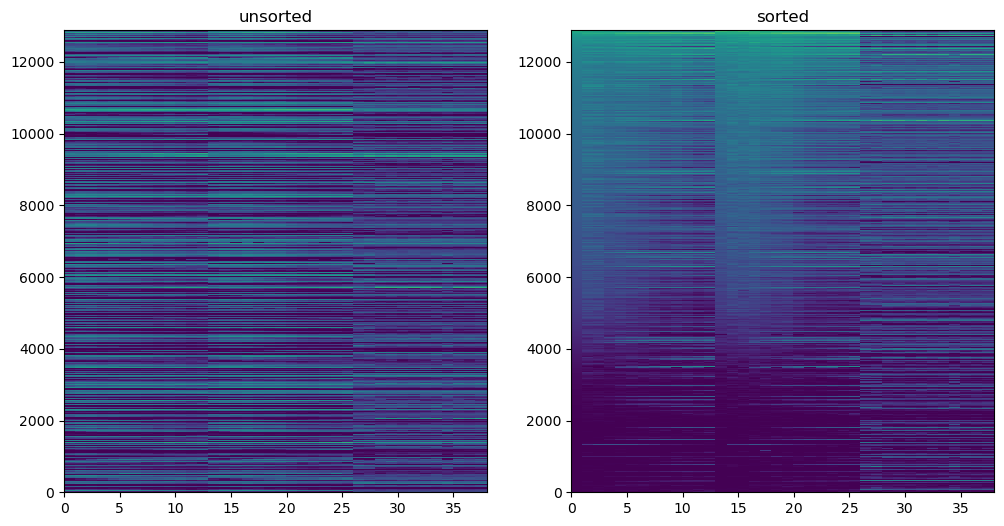

In [43]:
fig = plt.figure(figsize = (12,6))
ax = fig.add_subplot(1,2,1)
ax.pcolor(np.log2(all_data.to_numpy()+1))
ax.set_title("unsorted")
ax = fig.add_subplot(1,2,2)
ax.pcolor(np.log2(all_data.sort_values("UIC_1").to_numpy()+1))
ax.set_title("sorted")

In [44]:
data = pd.DataFrame(np.random.random((3,3)))

In [45]:
data

,0,1,2
0,0.205648,0.048911,0.675799
1,0.800357,0.493309,0.049498
2,0.501133,0.021206,0.830503


In [46]:
data.index = ['A','B','A']

In [47]:
data

,0,1,2
A,0.205648,0.048911,0.675799
B,0.800357,0.493309,0.049498
A,0.501133,0.021206,0.830503


In [52]:
data.index.duplicated(keep=False)

array([ True, False,  True])

In [55]:
x = data.loc[data.index.duplicated()]

In [56]:
y = data.loc[data.index.duplicated(keep = 'last')]

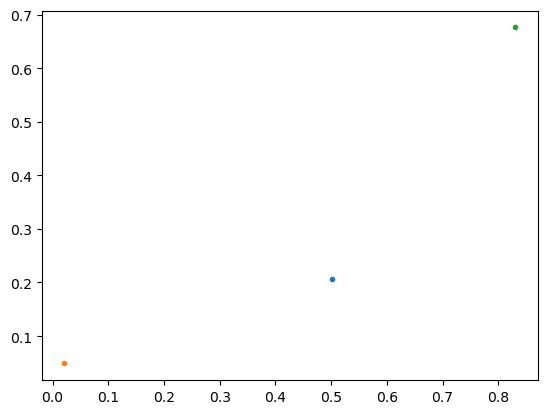

In [58]:
plt.plot(x,y,'.');

In [59]:
?pd.merge

Signature:
pd.merge(
    left: 'DataFrame | Series',
    right: 'DataFrame | Series',
    how: 'str' = 'inner',
    on: 'IndexLabel | None' = None,
    left_on: 'IndexLabel | None' = None,
    right_on: 'IndexLabel | None' = None,
    left_index: 'bool' = False,
    right_index: 'bool' = False,
    sort: 'bool' = False,
    suffixes: 'Suffixes' = ('_x', '_y'),
    copy: 'bool' = True,
    indicator: 'bool' = False,
    validate: 'str | None' = None,
) -> 'DataFrame'
Docstring:
Merge DataFrame or named Series objects with a database-style join.

A named Series object is treated as a DataFrame with a single named column.

The join is done on columns or indexes. If joining columns on
columns, the DataFrame indexes *will be ignored*. Otherwise if joining indexes
on indexes or indexes on a column or columns, the index will be passed on.
When performing a cross merge, no column specifications to merge on are
allowed.

.. warning::

    If both key columns contain rows where the key is a null